<a href="https://colab.research.google.com/github/tomas655/Proyectos-ACAMICA/blob/master/DS_Proyecto_02_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto 2: Ingeniería de features, Modelos avanzados e Interpretación de modelos

Aplica transformación de datos y entrena Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os.path 

from sklearn.impute import SimpleImputer

from google.colab import drive 
drive.mount('/content/drive')  

class color:
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

save_path = ('/content/drive/My Drive/ACAMICA/Colab Notebooks/Proyectos/proyecto_2_final')

sns.set()

Mounted at /content/drive


In [ ]:
drive = '/content/drive/My Drive/ACAMICA/Datasets/DS_Proyecto_01_Datos_Properati.csv' 
data = pd.read_csv(drive)
print(data.shape)
data.head(4)

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


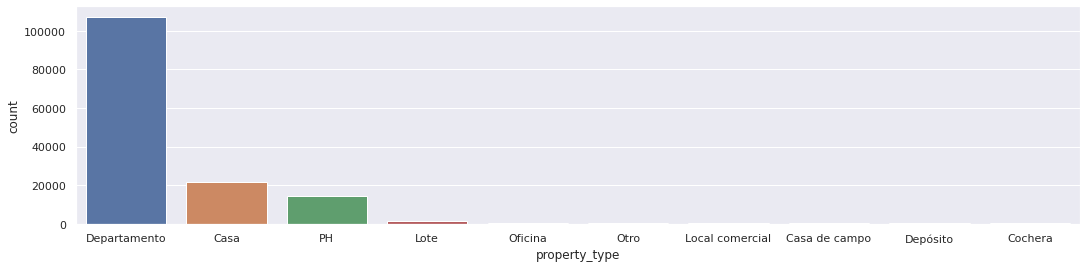

In [ ]:
plt.figure(figsize=(18,4))
sns.countplot(data['property_type'], order=data['property_type'].value_counts().index)

- A modo de continuacion del Proyecto 01, solo voy a predecir los **Departamentos,Casas y PH** ya que son los que mas registros poseen y solo en **Capital Federal**. Ademas para poder determinar si hubo o no mejora con respescto al anterior modelo.

In [ ]:
# Aplico una mascara para quedarme solo con las 3 propiedades con mas registros

mask_3_prop = (data.property_type.isin(['Departamento','PH','Casa']) & data.l2.isin(['Capital Federal']))

data = data[mask_3_prop]
data.shape

(91485, 19)

## PARTE A - Transformación de Datos



### 1- Detección y eliminación de Outliers

In [ ]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


- Se observa que hay propiedades de 26 ambientes (raro), 15 cuartos, 14 banos y superficies de mas de 100 mil m2, que tampoco tiene sentido.

In [ ]:
# Creo una mascara que elimine las instancias que poseean superficie cubierta mayor a superficie total

mask_surface = data['surface_covered'] <= data['surface_total']  
mask_surface.shape
data = data[mask_surface]
data.shape

(81291, 19)

In [ ]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(data.isnull().sum())

Nan values por columna
start_date            0
end_date              0
created_on            0
lat                4251
lon                4251
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms           833
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64


Text(0, 0.5, 'Cant de baños')

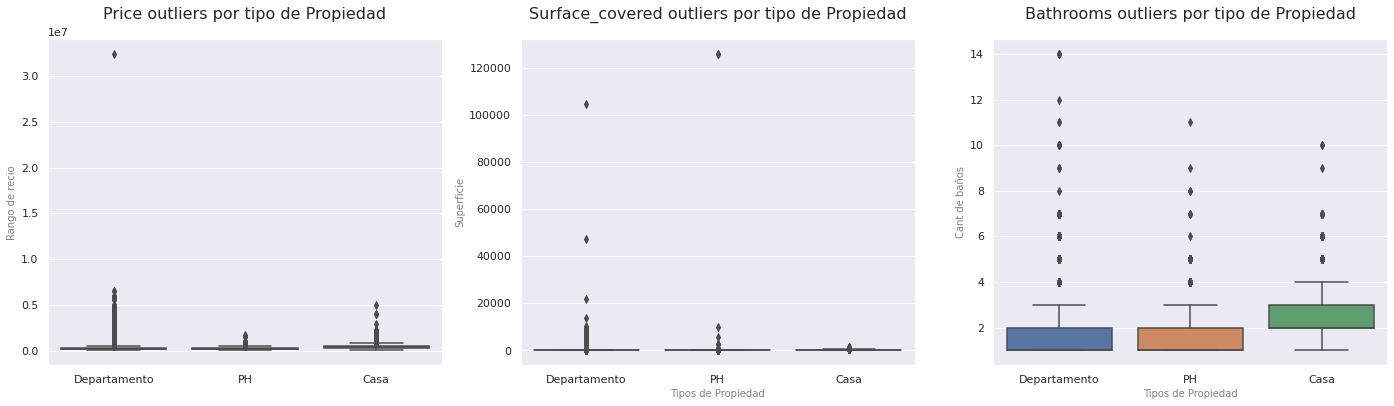

In [ ]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = data, x = 'property_type', y = "price")
plt.title('Price outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('', size = 10, color='gray')
plt.ylabel('Rango de recio', size = 10, color='gray')

plt.subplot(1,3,2)
sns.boxplot(data = data, x = 'property_type', y = "surface_covered")
plt.title('Surface_covered outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Superficie', size = 10, color='gray')

plt.subplot(1,3,3)
sns.boxplot(data = data, x = 'property_type', y = "bathrooms")
plt.title('Bathrooms outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Cant de baños', size = 10, color='gray')

In [ ]:
# Elimina los outliers por el metodo de 3 sigmas, devuelve el dataset

#def dropOutlier(data, mask, cleancol):  

#  meanval = data[mask][cleancol].mean()
#  std = data[mask][cleancol].std()
#  min = meanval - 3*std
#  max = meanval + 3*std
#  mask1 = np.logical_or(data[cleancol] < min, data[cleancol] > max)
#  return data.drop(data[mask & mask1].index)
  
#cols2clean=['rooms','bathrooms','bedrooms','surface_total','surface_covered']  # cleancol: es la comumna de la que queremos limpiar los outliers
#for l in cols2clean:
#  filas_pre=data.shape[0]
#  print('Filas pre eliminacion', filas_pre)
#  for k in data.property_type.unique():
#    data = dropOutlier(data=data, mask=(data['property_type']==k), cleancol=l)
#  print('Se elimiaron:{} registros'.format(filas_pre-data.shape[0]))
#print('Filas post eliminacion', data.shape[0])

In [ ]:
# Funcion para remover outliers mediante metodo IQR

def remove_outliers_iqr(column, data):
  
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)
    iqr = q3-q1
    min_iqr = q1-1.5*iqr
    max_iqr = q3+1.5*iqr

    return data.query(f'@min_iqr <= {column} <= @max_iqr')

In [ ]:
data = remove_outliers_iqr('rooms', data)
data = remove_outliers_iqr('bedrooms', data)
data = remove_outliers_iqr('bathrooms', data)
data = remove_outliers_iqr('surface_total', data)
data = remove_outliers_iqr('surface_covered', data)

In [ ]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,65620.000000,65620.000000,68908.000000,68908.000000,68908.000000,68908.000000,68908.000000,6.890800e+04
mean,-34.598377,-58.435910,2.696784,1.759825,1.345490,71.255239,62.816074,1.923094e+05
std,0.023024,0.034914,0.965080,0.810942,0.566297,31.486206,25.942572,1.146189e+05
min,-34.695087,-58.530467,1.000000,0.000000,1.000000,13.000000,1.000000,7.500000e+03
25%,-34.611947,-58.458102,2.000000,1.000000,1.000000,47.000000,42.000000,1.180000e+05
50%,-34.599124,-58.433547,3.000000,2.000000,1.000000,64.000000,57.000000,1.630000e+05
75%,-34.584781,-58.412192,3.000000,2.000000,2.000000,90.000000,79.000000,2.350000e+05
max,-34.535909,-58.353930,7.000000,6.000000,3.000000,184.000000,138.000000,3.249900e+06


In [ ]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(data.isnull().sum())


Nan values por columna
start_date            0
end_date              0
created_on            0
lat                3288
lon                3288
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64


- Se observa que eliminando outliers con el metodo IQR tambien se eliminan Valores faltantes en Bathrooms y Superficies, por lo cual, las rows que tenian errores tambien tenian Nan.

Text(0, 0.5, 'Cant de baños')

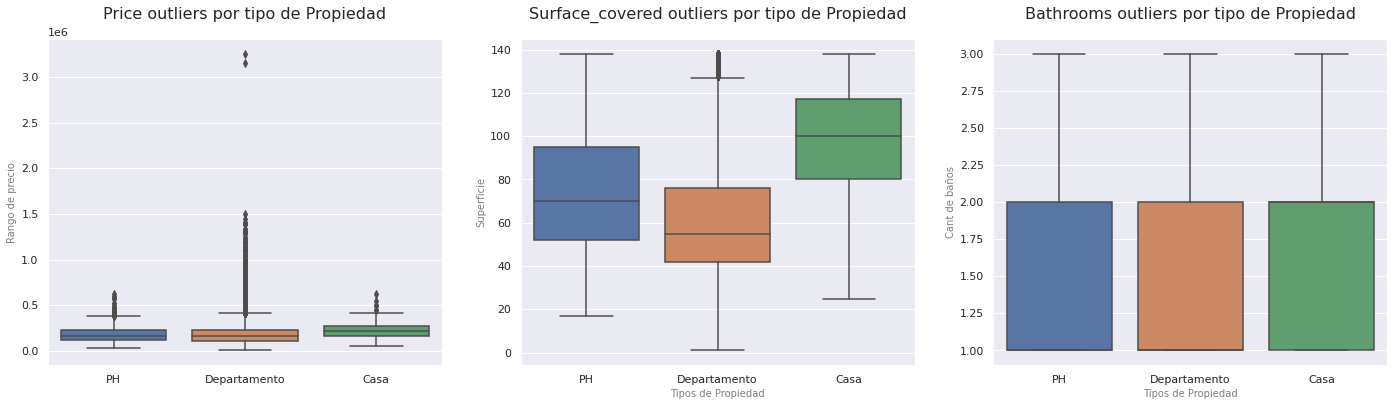

In [ ]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = data, x = 'property_type', y = "price")
plt.title('Price outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('', size = 10, color='gray')
plt.ylabel('Rango de precio', size = 10, color='gray')

plt.subplot(1,3,2)
sns.boxplot(data = data, x = 'property_type', y = "surface_covered")
plt.title('Surface_covered outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Superficie', size = 10, color='gray')

plt.subplot(1,3,3)
sns.boxplot(data = data, x = 'property_type', y = "bathrooms")
plt.title('Bathrooms outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('Cant de baños', size = 10, color='gray')

Text(0, 0.5, 'surface_total')

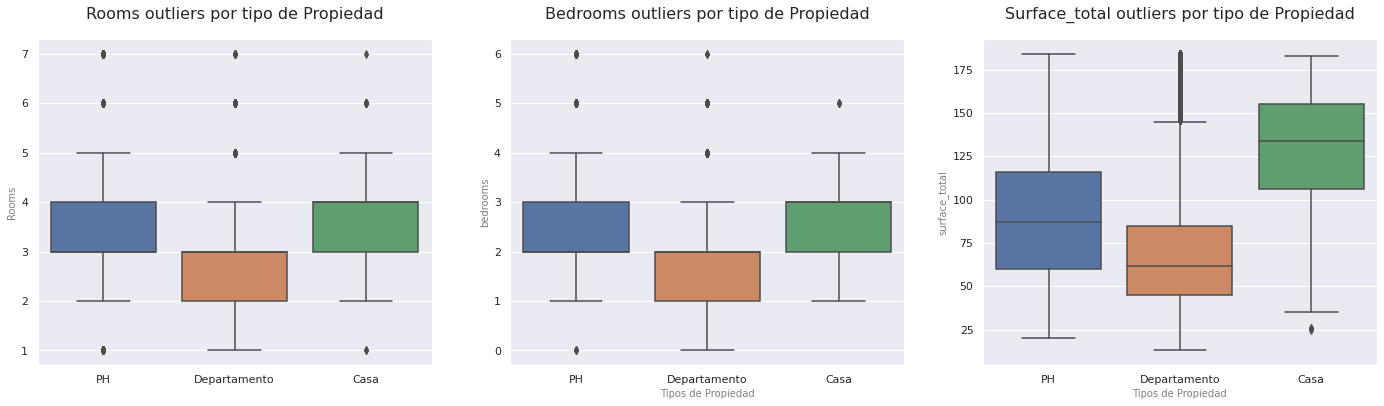

In [ ]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(data = data, x = 'property_type', y = "rooms")
plt.title('Rooms outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('', size = 10, color='gray')
plt.ylabel('Rooms', size = 10, color='gray')

plt.subplot(1,3,2)
sns.boxplot(data = data, x = 'property_type', y = "bedrooms")
plt.title('Bedrooms outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('bedrooms', size = 10, color='gray')

plt.subplot(1,3,3)
sns.boxplot(data = data, x = 'property_type', y = "surface_total")
plt.title('Surface_total outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('Tipos de Propiedad', size = 10, color='gray')
plt.ylabel('surface_total', size = 10, color='gray')

- Se observa que hay una mejor distribucion de valor. De igual modo se observa que todavia hay **departamentos con precios fuera de rango**, los voy a estudiar.

In [ ]:
depto_raro = (data.property_type.isin(['Departamento'])) & (data.price > 3000000)
data[depto_raro]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
28275,2019-05-12,2019-06-08,2019-05-12,-34.609558,-58.362674,Argentina,Capital Federal,Puerto Madero,2.0,1.0,1.0,54.0,54.0,3150000.0,USD,2 AMBIENTES C/COCHERA Puerto Madero Edif Terrazas,"Edificio Terrazas del Dique, vista a la pileta...",Departamento,Venta
116213,2020-01-23,9999-12-31,2020-01-23,-34.593645,-58.399170,Argentina,Capital Federal,Recoleta,3.0,2.0,2.0,82.0,73.0,3249900.0,USD,Semipiso a estrenar en Recoleta- Posesión en ...,"Emplazado en el exclusivo barrio de Recoleta, ...",Departamento,Venta


- Son 2 departamentos que dada su superficie es imposible desde la razon que superen los 3millones de dolares de precio, por ende, los voy a eliminar

In [ ]:
data.shape

(68908, 19)

In [ ]:
data.drop(data[data.property_type.isin(['Departamento']) & (data.price > 3000000)].index, inplace=True) 


In [ ]:
data.shape

(68906, 19)

Text(0, 0.5, 'Rango de precio')

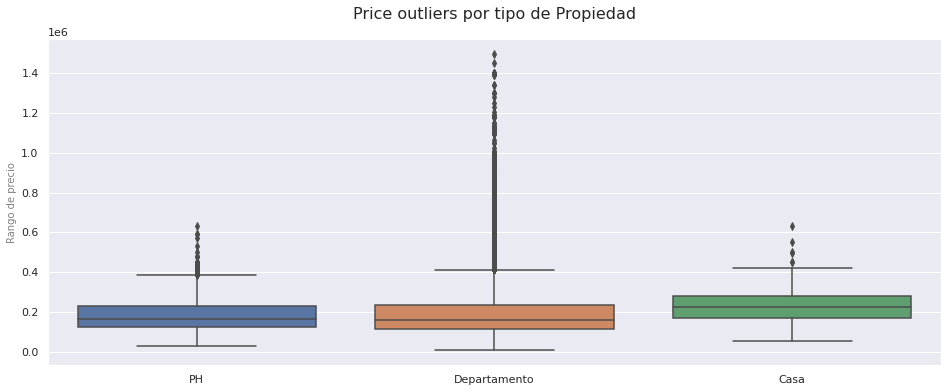

In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(data = data, x = 'property_type', y = "price")
plt.title('Price outliers por tipo de Propiedad', weight=10, size = 16, pad = 20)
plt.xlabel('', size = 10, color='gray')
plt.ylabel('Rango de precio', size = 10, color='gray')

In [ ]:
print(color.BOLD + '\nCantidad de registros por tipo de propiedad'+ color.END)
print(data.property_type.value_counts())
data.describe()


Cantidad de registros por tipo de propiedad
Departamento    61240
PH               7204
Casa              462
Name: property_type, dtype: int64


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,65618.000000,65618.000000,68906.00000,68906.000000,68906.000000,68906.000000,68906.000000,6.890600e+04
mean,-34.598377,-58.435912,2.69679,1.759832,1.345485,71.255333,62.816054,1.922221e+05
std,0.023024,0.034913,0.96509,0.810948,0.566298,31.486567,25.942898,1.134690e+05
min,-34.695087,-58.530467,1.00000,0.000000,1.000000,13.000000,1.000000,7.500000e+03
25%,-34.611947,-58.458103,2.00000,1.000000,1.000000,47.000000,42.000000,1.180000e+05
50%,-34.599124,-58.433547,3.00000,2.000000,1.000000,64.000000,57.000000,1.630000e+05
75%,-34.584781,-58.412193,3.00000,2.000000,2.000000,90.000000,79.000000,2.350000e+05
max,-34.535909,-58.353930,7.00000,6.000000,3.000000,184.000000,138.000000,1.495000e+06


- Corroboro que los numeros se acotaron a cantidades logicas de propiedades, con lo cual el metodo de **rango interquantilico** funciono correctamente. 

### 2- Encoding

In [ ]:
from sklearn import preprocessing
data_copy = data

In [ ]:
data = pd.get_dummies(data,columns=['property_type']) # , drop_first=True Drop first elimina una variable siendo 0/0 para mejorar el modelo

In [ ]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
count,65618.000000,65618.000000,68906.00000,68906.000000,68906.000000,68906.000000,68906.000000,6.890600e+04,68906.000000,68906.000000,68906.000000
mean,-34.598377,-58.435912,2.69679,1.759832,1.345485,71.255333,62.816054,1.922221e+05,0.006705,0.888747,0.104548
std,0.023024,0.034913,0.96509,0.810948,0.566298,31.486567,25.942898,1.134690e+05,0.081608,0.314447,0.305973
min,-34.695087,-58.530467,1.00000,0.000000,1.000000,13.000000,1.000000,7.500000e+03,0.000000,0.000000,0.000000
25%,-34.611947,-58.458103,2.00000,1.000000,1.000000,47.000000,42.000000,1.180000e+05,0.000000,1.000000,0.000000
50%,-34.599124,-58.433547,3.00000,2.000000,1.000000,64.000000,57.000000,1.630000e+05,0.000000,1.000000,0.000000
75%,-34.584781,-58.412193,3.00000,2.000000,2.000000,90.000000,79.000000,2.350000e+05,0.000000,1.000000,0.000000
max,-34.535909,-58.353930,7.00000,6.000000,3.000000,184.000000,138.000000,1.495000e+06,1.000000,1.000000,1.000000


In [ ]:
# Label Encoder lo mantiene en una columna, pero NO sirve porque jerarquiza los valores

#data['property_type'] = data['property_type'].astype('category')
#data['property_type_Cat'] = data['property_type'].cat.codes

#print(data.shape)
#data

In [ ]:
data = pd.get_dummies(data,columns=['l3']) # , drop_first=True Drop first elimina una variable siendo 0/0 para mejorar el modelo

In [ ]:
data.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,operation_type,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,Venta,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",Venta,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,Venta,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3- Imputación de valores faltantes

In [ ]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(data.isnull().sum())

Nan values por columna
start_date                0
end_date                  0
created_on                0
lat                    3288
lon                    3288
                       ... 
l3_Villa Riachuelo        0
l3_Villa Santa Rita       0
l3_Villa Soldati          0
l3_Villa Urquiza          0
l3_Villa del Parque       0
Length: 77, dtype: int64


- Comienzo imputando los Nan de lat y lon

In [ ]:
# Con Simple Imputer se podria completar pero es demasiado simple 

#si = SimpleImputer()
#si.fit(data[['lat','lon']],data['l3'])

#data[['lat','lon']]=si.fit_transform(data[['lat','lon']])

In [ ]:
# Mejor hacerlo con la media de Cada barrio

gr = data_copy.groupby(["l3"])     

t = gr[['l3','lat','lon']].mean()
data["lat"].fillna(gr.lat.transform("mean"),inplace=True)
data["lon"].fillna(gr.lon.transform("mean"),inplace=True)  

In [ ]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(data.isnull().sum().head(18))

Nan values por columna
start_date            0
end_date              0
created_on            0
lat                   0
lon                   0
l1                    0
l2                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
operation_type        0
property_type_Casa    0
dtype: int64


In [ ]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
count,68906.000000,68906.000000,68906.00000,68906.000000,68906.000000,68906.000000,68906.000000,6.890600e+04,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.00000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.00000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000
mean,-34.598122,-58.435276,2.69679,1.759832,1.345485,71.255333,62.816054,1.922221e+05,0.006705,0.888747,0.104548,0.005747,0.001988,0.092285,0.031478,0.007982,0.037123,0.068833,0.003454,0.009448,0.071518,0.000058,0.006197,0.008345,0.006647,0.016994,0.007851,0.005021,0.025876,0.009927,0.007416,0.007372,0.00624,0.009244,0.007285,0.022973,0.009419,0.149218,0.002366,0.017139,0.008446,0.003120,0.004978,0.011189,0.001843,0.013830,0.057339,0.008229,0.012263,0.012423,0.009215,0.012263,0.002061,0.001480,0.002220,0.080675,0.014280,0.004064,0.004992,0.006037,0.003236,0.00833,0.001582,0.000392,0.003991,0.000522,0.039663,0.015891
std,0.022884,0.034749,0.96509,0.810948,0.566298,31.486567,25.942898,1.134690e+05,0.081608,0.314447,0.305973,0.075591,0.044545,0.289430,0.174606,0.088985,0.189065,0.253172,0.058669,0.096740,0.257690,0.007619,0.078476,0.090968,0.081257,0.129250,0.088260,0.070684,0.158766,0.099137,0.085796,0.085546,0.07875,0.095703,0.085043,0.149819,0.096592,0.356306,0.048580,0.129791,0.091515,0.055772,0.070378,0.105186,0.042892,0.116788,0.232491,0.090338,0.110059,0.110764,0.095554,0.110059,0.045349,0.038446,0.047069,0.272338,0.118645,0.063616,0.070480,0.077465,0.056797,0.09089,0.039741,0.019791,0.063048,0.022851,0.195167,0.125056
min,-34.695087,-58.530467,1.00000,0.000000,1.000000,13.000000,1.000000,7.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-34.611615,-58.456675,2.00000,1.000000,1.000000,47.000000,42.000000,1.180000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

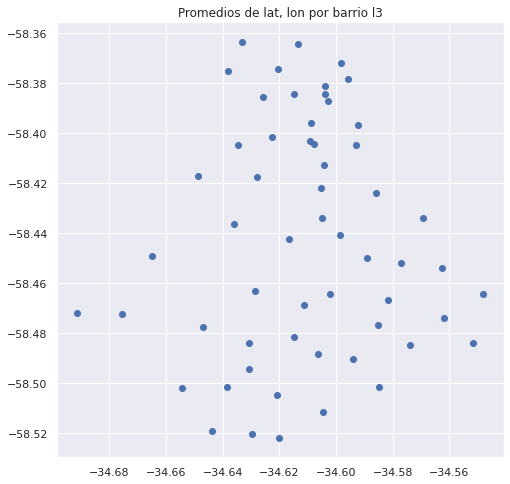

In [ ]:
# Para vizualizar que estan todos dentro de Capital Federal

plt.figure(figsize=(8,8))
plt.scatter(t.lat, t.lon)
plt.title('Promedios de lat, lon por barrio l3')
plt.show()

- A contnuacion habia realizado metodos para rellenar los faltantes en Bathrooms y Superficies con KNN neighbours pero como arriba al final realice cambios y quedo obsoleto

In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

In [ ]:
#%%time
#knn_columnas = ['bathrooms', 'surface_total', 'surface_covered','rooms', 'bedrooms'] #,'rooms',	'bedrooms'

#X=data[knn_columnas]
#imputer = KNNImputer(n_neighbors=3, weights='uniform')           
#imputer.fit_transform(X)                                          
#Xtrans = imputer.transform(X)

In [ ]:
# Store data
#with open(save_path+'knnimp.pickle', 'wb') as knnimp1:
#    pickle.dump(Xtrans, knnimp1, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load data
#with open(save_path+'knnimp.pickle', 'rb') as knnimp1:
#    Xtrans = pickle.load(knnimp1)

In [ ]:
#data.bathrooms = Xtrans[:,0]
#data.surface_total = Xtrans[:,1]
#data.surface_covered = Xtrans[:,2]

### 4- Escalado de datos 

In [ ]:
print(data.shape)
data.head(1)

(68906, 77)


,start_date,end_date,created_on,lat,lon,l1,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,operation_type,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.41211,Argentina,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,Venta,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- Antes de Escalar los datos voy a eliminar las coumnas que ya no sirven

In [ ]:
data = data.drop(columns=['start_date',	'end_date',	'created_on', 'l1', 'l2', 'currency', 'title',	'description',	'operation_type']) #'description','currency'])
print(data.shape)
data.head(1)

(68906, 68)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
1,-34.624056,-58.41211,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#data = round('l3',2) # VER SACAR DECIMALES

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Separo features y target para MinMax
X_for_scaler = data.drop('price', axis=1)
y_price = data['price']

In [ ]:
# MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(X_for_scaler)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_scaled = scaler.transform(X_for_scaler)
scaled_df = pd.DataFrame(X_scaled, index=X_for_scaler.index, columns=X_for_scaler.columns)
scaled_df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
count,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.00000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.00000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000
mean,0.609159,0.539214,0.282798,0.293305,0.172743,0.340674,0.451212,0.006705,0.888747,0.104548,0.005747,0.001988,0.092285,0.031478,0.007982,0.037123,0.068833,0.003454,0.009448,0.071518,0.000058,0.006197,0.008345,0.006647,0.016994,0.007851,0.005021,0.025876,0.009927,0.007416,0.007372,0.00624,0.009244,0.007285,0.022973,0.009419,0.149218,0.002366,0.017139,0.008446,0.003120,0.004978,0.011189,0.001843,0.013830,0.057339,0.008229,0.012263,0.012423,0.009215,0.012263,0.002061,0.001480,0.002220,0.080675,0.014280,0.004064,0.004992,0.006037,0.003236,0.00833,0.001582,0.000392,0.003991,0.000522,0.039663,0.015891
std,0.143761,0.196835,0.160848,0.135158,0.283149,0.184132,0.189364,0.081608,0.314447,0.305973,0.075591,0.044545,0.289430,0.174606,0.088985,0.189065,0.253172,0.058669,0.096740,0.257690,0.007619,0.078476,0.090968,0.081257,0.129250,0.088260,0.070684,0.158766,0.099137,0.085796,0.085546,0.07875,0.095703,0.085043,0.149819,0.096592,0.356306,0.048580,0.129791,0.091515,0.055772,0.070378,0.105186,0.042892,0.116788,0.232491,0.090338,0.110059,0.110764,0.095554,0.110059,0.045349,0.038446,0.047069,0.272338,0.118645,0.063616,0.070480,0.077465,0.056797,0.09089,0.039741,0.019791,0.063048,0.022851,0.195167,0.125056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.524396,0.418001,0.166667,0.166667,0.000000,0.198830,0.299270,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

### 5- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA)

In [ ]:
# Duplico Datasets para hacer PCA sobre data con y sin escalado

data_para_pca = data.drop(['price'], axis=1) #.values
scaled_features_df = scaled_df

price = data['price']

In [ ]:
data_para_pca.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

- Primero hare PCA sobre el Dataset comun y luego sobre el escalado para ver diferentes resultados

#### PCA sobre Data Original

In [ ]:
print(data_para_pca.shape)
data_para_pca.describe()

(68906, 67)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
count,68906.000000,68906.000000,68906.00000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.00000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.00000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000,68906.000000
mean,-34.598122,-58.435276,2.69679,1.759832,1.345485,71.255333,62.816054,0.006705,0.888747,0.104548,0.005747,0.001988,0.092285,0.031478,0.007982,0.037123,0.068833,0.003454,0.009448,0.071518,0.000058,0.006197,0.008345,0.006647,0.016994,0.007851,0.005021,0.025876,0.009927,0.007416,0.007372,0.00624,0.009244,0.007285,0.022973,0.009419,0.149218,0.002366,0.017139,0.008446,0.003120,0.004978,0.011189,0.001843,0.013830,0.057339,0.008229,0.012263,0.012423,0.009215,0.012263,0.002061,0.001480,0.002220,0.080675,0.014280,0.004064,0.004992,0.006037,0.003236,0.00833,0.001582,0.000392,0.003991,0.000522,0.039663,0.015891
std,0.022884,0.034749,0.96509,0.810948,0.566298,31.486567,25.942898,0.081608,0.314447,0.305973,0.075591,0.044545,0.289430,0.174606,0.088985,0.189065,0.253172,0.058669,0.096740,0.257690,0.007619,0.078476,0.090968,0.081257,0.129250,0.088260,0.070684,0.158766,0.099137,0.085796,0.085546,0.07875,0.095703,0.085043,0.149819,0.096592,0.356306,0.048580,0.129791,0.091515,0.055772,0.070378,0.105186,0.042892,0.116788,0.232491,0.090338,0.110059,0.110764,0.095554,0.110059,0.045349,0.038446,0.047069,0.272338,0.118645,0.063616,0.070480,0.077465,0.056797,0.09089,0.039741,0.019791,0.063048,0.022851,0.195167,0.125056
min,-34.695087,-58.530467,1.00000,0.000000,1.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-34.611615,-58.456675,2.00000,1.000000,1.000000,47.000000,42.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
#data_para_pca.round(decimals=2) # VER SACAR DECIMALES

In [ ]:
%%time

variances = []
individual_variances = []
n_components = np.arange(1, data_para_pca.shape[1])

for i in n_components: 
    pca_loop = PCA(n_components=i)
    data_pca_loop = pca_loop.fit_transform(data_para_pca)
    variance_ratio = pca_loop.explained_variance_ratio_
    individual_variances.append(variance_ratio)
    variances.append(variance_ratio.sum())

CPU times: user 1min 9s, sys: 19.9 s, total: 1min 29s
Wall time: 45.5 s


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


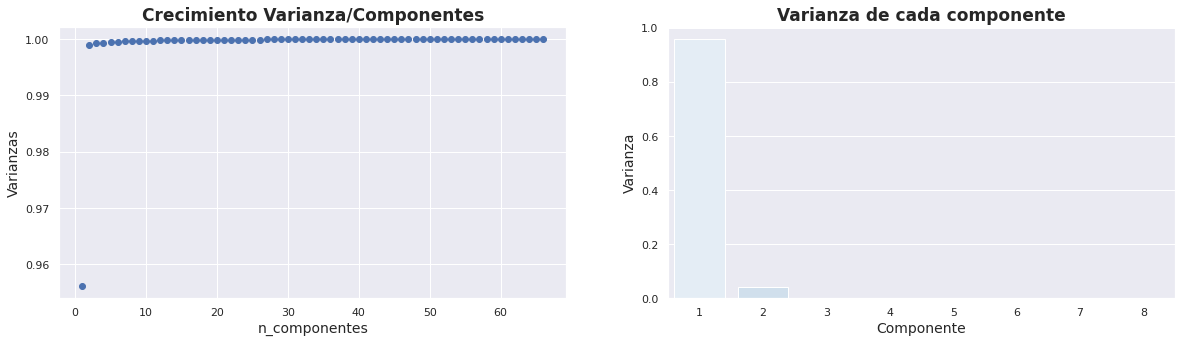

In [ ]:
font_title = dict(fontsize=17, fontweight='bold')
font_axis = dict(fontsize=14)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.xlabel('n_componentes', fontdict=font_axis)
plt.ylabel('Varianzas', fontdict=font_axis)
plt.title('Crecimiento Varianza/Componentes', fontdict=font_title)
plt.plot(n_components, variances,'o')

plt.subplot(1, 2, 2)
k = 8

plt.title('Varianza de cada componente', fontdict=font_title)
plt.xlabel('Componente', fontdict=font_axis)
plt.ylabel('Varianza', fontdict=font_axis)
sns.barplot(np.arange(1, k+1), individual_variances[k-1], palette='Blues')

In [ ]:
# Save data

#data_para_pca.to_csv('/content/drive/My Drive/ACAMICA/Colab Notebooks/Proyectos/proyecto_2_final/data_para_pca.csv') 

In [ ]:
# Load data

#data_para_pca = pd.read_csv('/content/drive/My Drive/ACAMICA/Colab Notebooks/Proyectos/proyecto_2_final/data_para_pca.csv') 

#### PCA sobre Data Escalada

In [ ]:
%%time

variances = []
individual_variances = []
n_components = np.arange(1, scaled_features_df.shape[1])

for i in n_components: 
    pca_loop = PCA(n_components=i)
    data_pca_loop = pca_loop.fit_transform(scaled_features_df)
    variance_ratio = pca_loop.explained_variance_ratio_
    individual_variances.append(variance_ratio)
    variances.append(variance_ratio.sum())

CPU times: user 1min 10s, sys: 19.8 s, total: 1min 30s
Wall time: 45.8 s


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


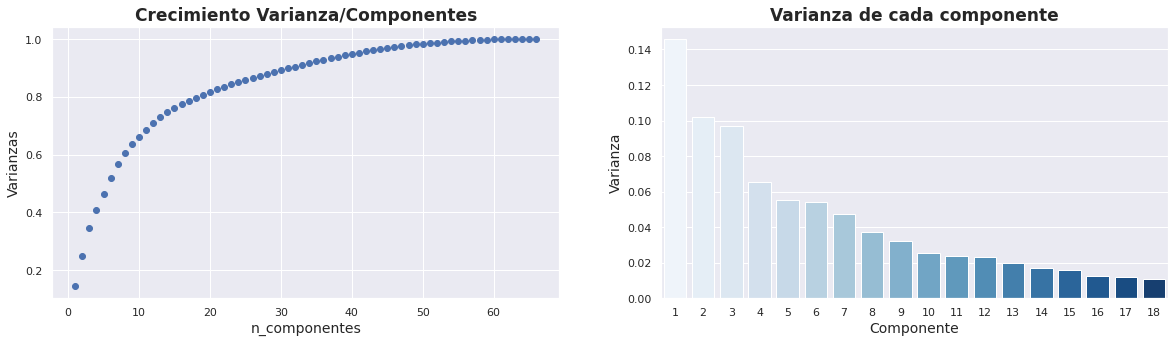

In [ ]:
font_title = dict(fontsize=17, fontweight='bold')
font_axis = dict(fontsize=14)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.xlabel('n_componentes', fontdict=font_axis)
plt.ylabel('Varianzas', fontdict=font_axis)
plt.title('Crecimiento Varianza/Componentes', fontdict=font_title)
plt.plot(n_components, variances,'o')

plt.subplot(1, 2, 2)
k = 18

plt.title('Varianza de cada componente', fontdict=font_title)
plt.xlabel('Componente', fontdict=font_axis)
plt.ylabel('Varianza', fontdict=font_axis)
sns.barplot(np.arange(1, k+1), individual_variances[k-1], palette='Blues')

- Sobre la data Escalada observo que con 30 features estaria al 90% de varianza

In [ ]:
scaled_features_df.shape

(68906, 67)

In [ ]:
pca = PCA(n_components=30)
data_pca_sc = pca.fit_transform(scaled_features_df)

In [ ]:
df_sc_final = pd.DataFrame(data=data_pca_sc, columns=['principal component 1','principal component 2','principal component 3','principal component 4',
                                                                  'principal component 5','principal component 6','principal component 7','principal component 8',
                                                                  'principal component 9','principal component 10',
                                                                  'principal component 11','principal component 12','principal component 13','principal component 14',
                                                                  'principal component 15','principal component 16','principal component 17','principal component 18',
                                                                  'principal component 19','principal component 20',
                                                                  'principal component 21','principal component 22','principal component 23','principal component 24',
                                                                  'principal component 25','principal component 26','principal component 27','principal component 28',
                                                                  'principal component 29','principal component 30'])

In [ ]:
df_sc_final.shape

(68906, 30)

In [ ]:
df_sc_final['price'] = 0
df_sc_final.shape

(68906, 31)

In [ ]:
price = pd.DataFrame(data=price, columns=['price'])

In [ ]:
price.reset_index(drop=True, inplace=True)


In [ ]:
df_sc_final['price'] = price
df_sc_final.shape

(68906, 31)

In [ ]:
df_sc_final

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,price
0,1.194050,-0.213721,0.148021,0.037264,-0.017678,0.050736,0.176180,-0.092968,0.138144,0.115008,0.376441,-0.326392,-0.160406,-0.137781,-0.036689,-0.049527,-0.037713,-0.022104,-0.124531,0.023115,-0.049606,-0.050844,-0.126099,-0.239999,0.154843,-0.549362,-0.296649,0.147123,0.351474,-0.431816,159000.0
1,0.967395,-0.170419,1.170411,0.118529,-0.058230,-0.041805,0.063542,-0.199843,-0.037228,0.137545,0.123094,-0.095190,-0.045737,0.027111,0.050443,-0.005273,0.031217,0.016667,-0.008647,-0.026789,0.006470,0.010009,-0.009269,-0.007345,-0.020381,0.004020,0.008273,-0.011916,0.005252,0.019781,125000.0
2,1.018934,-0.077328,1.136054,0.093112,-0.064148,-0.068552,0.043446,-0.171423,-0.063193,0.126501,0.055495,-0.045788,-0.000905,0.021743,0.050860,0.020351,0.016789,0.009857,0.059768,-0.046379,-0.005867,0.002447,0.039467,0.015857,0.031664,0.027452,0.021160,-0.006931,0.004757,-0.042291,295000.0
3,1.104300,-0.694384,0.227661,-0.257821,0.707306,-0.248491,-0.118555,-0.294855,-0.088097,0.182276,0.119723,-0.047723,-0.018526,0.016768,0.076290,0.019249,0.025450,0.019862,0.042864,-0.035457,0.012436,0.011264,0.014711,0.010046,0.013704,0.024760,0.016063,-0.009903,0.008365,-0.026050,150000.0
4,1.134636,-0.626467,0.199080,-0.244456,0.731570,-0.228109,-0.105732,-0.307231,-0.065542,0.160613,0.090713,-0.005109,-0.032333,-0.013478,0.077528,0.019925,0.007969,0.013867,0.065714,-0.060028,0.002247,0.004508,0.040529,0.014896,0.043165,0.034272,0.016091,-0.012229,0.012569,-0.050717,159500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68901,-0.062140,0.858400,0.551425,0.010165,0.080485,-0.010138,-0.137740,0.044311,-0.036760,-0.043171,-0.063967,0.049484,0.021724,0.033815,-0.013415,-0.002571,0.000384,0.001607,-0.032994,0.025515,0.000990,-0.002747,-0.017427,-0.003022,-0.037496,-0.015001,-0.004523,0.008516,-0.011944,0.015356,660000.0
68902,0.044159,1.225049,0.399479,-0.040225,0.111446,-0.013793,-0.194885,0.101559,-0.060183,0.026689,0.141766,-0.162864,-0.019634,0.063218,-0.047366,0.006345,-0.030840,-0.012205,0.004593,0.002904,-0.016188,-0.016943,0.060992,0.018096,0.073881,0.022928,0.013183,-0.003285,0.007852,-0.058286,539000.0
68903,-0.057593,0.871497,0.547357,0.010897,0.083221,-0.010315,-0.134764,0.041764,-0.035056,-0.042516,-0.068247,0.058165,0.024223,0.028081,-0.010333,0.000427,-0.001196,0.001721,-0.025574,0.023375,0.001460,-0.002837,-0.013829,-0.000994,-0.031812,-0.011917,-0.003738,0.008648,-0.011182,0.008889,620000.0
68904,1.403266,1.024367,0.664574,0.027520,0.098232,-0.038021,-0.085746,-0.068774,-0.042400,0.133208,0.207287,-0.163029,-0.038010,0.037102,0.020076,0.016176,-0.005236,0.010347,0.000898,-0.007007,0.002023,-0.006643,0.041619,0.011537,0.046736,0.030623,0.019684,-0.007503,0.009054,-0.050301,570000.0


In [ ]:
# save data
#df_sc_final.to_csv('/content/drive/My Drive/ACAMICA/Colab Notebooks/Proyectos/proyecto_2_final/df_sc_final.csv') 

In [ ]:
# load data
#df_sc_final = pd.read_csv('/content/drive/My Drive/ACAMICA/Colab Notebooks/Proyectos/proyecto_2_final/df_sc_final.csv') 
#df_sc_final = df_sc_final.drop('Unnamed: 0',axis=1)

###- Benchmark

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data.corr(method = 'spearman').style.background_gradient(cmap='coolwarm') 

### - Decision Tree Regressor como *Benchmark*

In [ ]:
# Creo una funcion para graficar distribucion de errores

def dist_errors(model, model_name, hasReg=False):
    if hasReg:
        y_train_pred = model.predict(X_train_new)
        y_test_pred = model.predict(X_test_new)
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    print(f'Modelo: {model_name}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.distplot(y_train - y_train_pred, bins=15, label='train')  # ver 
    sns.distplot(y_test - y_test_pred, bins=15, label='test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1, 2, 2)
    ax.scatter(y_test, y_test_pred, s=2)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

#### - Data Numerica

In [ ]:
print(data.shape)
data.head(5)

(68906, 68)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data.drop(['price'], axis=1)
y = data.price
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 6038.976912711435
Raíz del error cuadrático medio en Test: 43885.39609566451


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


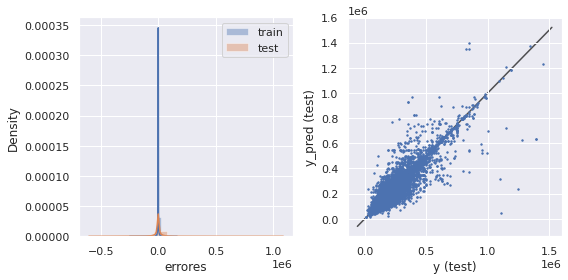

In [ ]:
dist_errors(tree_model, 'Árbol de Decisión')

- Primer Resultado! Con respecto al **proyecto 1** se observa una gran mejoria del Modelo Tree Regressor simple. **usd 200.000** vs **usd 43000**

#### - Data Escalada

In [ ]:
print(scaled_features_df.shape)
scaled_features_df.head()

(68906, 67)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
1,0.446237,0.670438,0.166667,0.166667,0.5,0.333333,0.416058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.637763,0.583409,0.166667,0.166667,0.0,0.187135,0.321168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.714877,0.530842,0.166667,0.166667,0.0,0.421053,0.357664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.636443,0.505438,0.166667,0.166667,0.0,0.251462,0.401460,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.591154,0.551759,0.166667,0.166667,0.0,0.333333,0.503650,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
price

,price
0,159000.0
1,125000.0
2,295000.0
3,150000.0
4,159500.0
...,...
68901,660000.0
68902,539000.0
68903,620000.0
68904,570000.0


In [ ]:
X = scaled_features_df
y = data.price.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

In [ ]:
tree_model_2 = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

Modelo: Árbol de Decisión 2
Raíz del error cuadrático medio en Train: 5983.046211459242
Raíz del error cuadrático medio en Test: 43670.1556323071


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


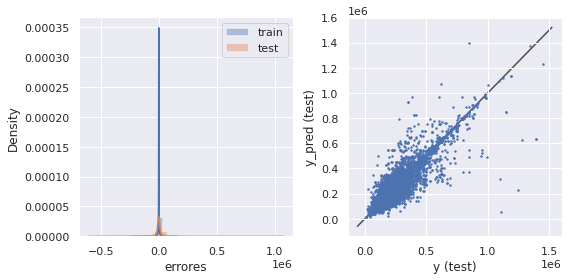

In [ ]:
dist_errors(tree_model_2, 'Árbol de Decisión 2')

La Data Escalada tiene una muy pequena mejora frente a la Data Numerica, pero por el momento no es algo importante.

- Pruebo el mismo dataset sin lat y lon

In [ ]:
scaled_features_df_sinlatlon = scaled_features_df
scaled_features_df_sinlatlon = scaled_features_df_sinlatlon.drop(['lat', 'lon'], axis=1)

In [ ]:
X = scaled_features_df_sinlatlon
y = data.price.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

In [ ]:
tree_model_6 = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

Modelo: Árbol de Decisión 2
Raíz del error cuadrático medio en Train: 17847.436980990868
Raíz del error cuadrático medio en Test: 46949.838026594516


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


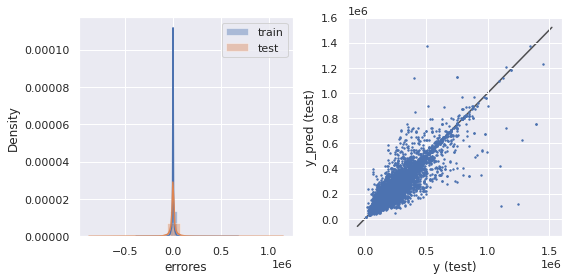

In [ ]:
dist_errors(tree_model_6, 'Árbol de Decisión 2')

- Corroboro que el Tree Regressor empeora quitandole las features de Lat y Lon

#### Data PCA

In [ ]:
# No se puede hacer porque falla en pca, absorve casi el 100% de varianza en un solo cluster.

#### Data Escalada + PCA


In [ ]:
df_sc_final.head(1)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,price
0,1.19405,-0.213721,0.148021,0.037264,-0.017678,0.050736,0.17618,-0.092968,0.138144,0.115008,0.376441,-0.326392,-0.160406,-0.137781,-0.036689,-0.049527,-0.037713,-0.022104,-0.124531,0.023115,-0.049606,-0.050844,-0.126099,-0.239999,0.154843,-0.549362,-0.296649,0.147123,0.351474,-0.431816,159000.0


In [ ]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(df_sc_final.isnull().sum().head(45))

Nan values por columna
principal component 1     0
principal component 2     0
principal component 3     0
principal component 4     0
principal component 5     0
principal component 6     0
principal component 7     0
principal component 8     0
principal component 9     0
principal component 10    0
principal component 11    0
principal component 12    0
principal component 13    0
principal component 14    0
principal component 15    0
principal component 16    0
principal component 17    0
principal component 18    0
principal component 19    0
principal component 20    0
principal component 21    0
principal component 22    0
principal component 23    0
principal component 24    0
principal component 25    0
principal component 26    0
principal component 27    0
principal component 28    0
principal component 29    0
principal component 30    0
price                     0
dtype: int64


In [ ]:
X = df_sc_final.drop(['price'], axis=1)
y = data.price.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

In [ ]:
tree_model_4 = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

Modelo: Árbol de Decisión 4
Raíz del error cuadrático medio en Train: 5983.046211459242
Raíz del error cuadrático medio en Test: 46861.76220553224


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


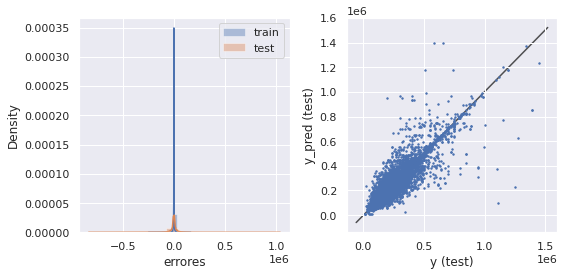

In [ ]:
dist_errors(tree_model_4, 'Árbol de Decisión 4')

- El mejor resultado del benchmark Desision Tree arrojado es con Data Escalada sin pasar por PCA. El error obtenido de **43000 usd** y en comparacion al proyecto 1 (200000 usd) hubo una buena mejoria. Por lo pronto para los modelos de ensamble voy a usar este Dataset Escalado + PCA

## PARTE B - Modelos Avanzados


### 6- Elige dos de los modelos avanzados vistos 
(en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score


#### - Random Forest y XGBoost

In [ ]:
scaled_features_df.head(15)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,price
1,0.446237,0.670438,0.166667,0.166667,0.5,0.333333,0.416058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125000.0
2,0.637763,0.583409,0.166667,0.166667,0.0,0.187135,0.321168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295000.0
3,0.714877,0.530842,0.166667,0.166667,0.0,0.421053,0.357664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150000.0
5,0.636443,0.505438,0.166667,0.166667,0.0,0.251462,0.401460,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159500.0
6,0.591154,0.551759,0.166667,0.166667,0.0,0.333333,0.503650,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89000.0
7,0.591154,0.551759,0.166667,0.166667,0.0,0.333333,0.503650,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89000.0
8,0.348593,0.627945,0.000000,0.166667,0.0,0.187135,0.262774,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170000.0
9,0.348593,0.627945,0.000000,0.166667,0.0,0.187135,0.262774,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149000.0
10,0.683899,0.193998,0.166667,0.166667,0.5,0.309942,0.350365,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,115000.0
11,0.574224,0.843507,0.166667,0.166667,0.0,0.321637,0.423358,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
price.shape

(68906, 1)

In [ ]:
price.reindex

<bound method DataFrame.reindex of           price
0      159000.0
1      125000.0
2      295000.0
3      150000.0
4      159500.0
...         ...
68901  660000.0
68902  539000.0
68903  620000.0
68904  570000.0
68905  480000.0

[68906 rows x 1 columns]>

In [ ]:
scaled_features_df['price'] = price.values

In [ ]:
scaled_features_df.shape

(68906, 68)

In [ ]:
scaled_features_df.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Flores,l3_Floresta,l3_Las Cañitas,l3_Liniers,l3_Mataderos,l3_Monserrat,l3_Monte Castro,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pompeya,l3_Puerto Madero,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Nicolás,l3_San Telmo,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,price
1,0.446237,0.670438,0.166667,0.166667,0.5,0.333333,0.416058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159000.0
2,0.637763,0.583409,0.166667,0.166667,0.0,0.187135,0.321168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125000.0
3,0.714877,0.530842,0.166667,0.166667,0.0,0.421053,0.357664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295000.0
5,0.636443,0.505438,0.166667,0.166667,0.0,0.251462,0.401460,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150000.0
6,0.591154,0.551759,0.166667,0.166667,0.0,0.333333,0.503650,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159500.0


In [ ]:
print(color.BOLD + 'Nan values por columna'+ color.END)
print(scaled_features_df.isnull().sum().tail(1))

Nan values por columna
price    0
dtype: int64


In [ ]:
#save
#scaled_features_df.to_csv('/content/drive/My Drive/ACAMICA/Colab Notebooks/Proyectos/proyecto_2_final/scaled_features_df.csv') 

In [ ]:
#load
scaled_features_df = pd.read_csv('/content/drive/My Drive/ACAMICA/Colab Notebooks/Proyectos/proyecto_2_final/scaled_features_df.csv') 

In [ ]:
X = scaled_features_df.drop(['price'], axis=1)
y = scaled_features_df.price
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

In [ ]:
# RandomForestRegressor
randomForest = RandomForestRegressor(random_state=42)

# XGBRegressor
xgbRegressor = XGBRegressor(random_state=42)

In [ ]:
# Cross Validation

%%time
n_cv = 4    

# CV RandomForest
randomForest_scores = cross_val_score(randomForest, X, y, n_jobs=-1, cv=n_cv)  

# CV XGBRegressor
xgbRegressor_scores = cross_val_score(xgbRegressor, X, y, n_jobs=-1, cv=n_cv)  

CPU times: user 96.1 ms, sys: 64 ms, total: 160 ms
Wall time: 2min 4s


In [ ]:
# Store data
#with open(save_path+'rf_cv.pickle', 'wb') as rf_cv:
#    pickle.dump(randomForest_scores, rf_cv, protocol=pickle.HIGHEST_PROTOCOL)

#with open(save_path+'xgb_cv.pickle', 'wb') as xgb_cv:
#    pickle.dump(xgbRegressor_scores, xgb_cv, protocol=pickle.HIGHEST_PROTOCOL)    

In [ ]:
# Load data
#with open(save_path+'rf_cv.pickle', 'rb') as rf_cv:
#    randomForest_scores = pickle.load(rf_cv)

#with open(save_path+'xgb_cv.pickle', 'rb') as xgb_cv:
#    xgbRegressor_scores = pickle.load(xgb_cv)

In [ ]:
models=['RandomForest', 'XGBRegressor']
for name, model_score in zip(models,[randomForest_scores, xgbRegressor_scores]):
    print(f"Accuracy para {name}: %0.2f (+/- %0.2f)" % (model_score.mean(), model_score.std() * 2))  #REVISAR

Accuracy para RandomForest: 0.89 (+/- 0.02)
Accuracy para XGBRegressor: 0.80 (+/- 0.01)


In [ ]:
# Entrenamiento de Modelos

randomForest.fit(X_train, y_train)
xgbRegressor.fit(X_train, y_train)

[01:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Modelo: RandomForest
Raíz del error cuadrático medio en Train: 13048.0277468716
Raíz del error cuadrático medio en Test: 36292.51555389397


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


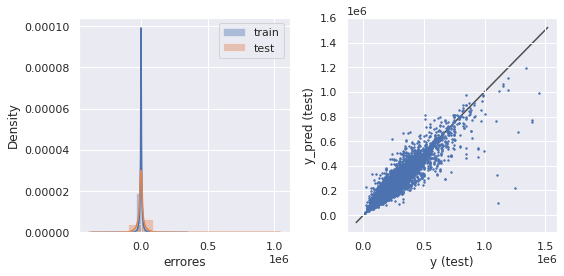

Modelo: XGBRegressor
Raíz del error cuadrático medio en Train: 49084.81870871425
Raíz del error cuadrático medio en Test: 50992.90515041454


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


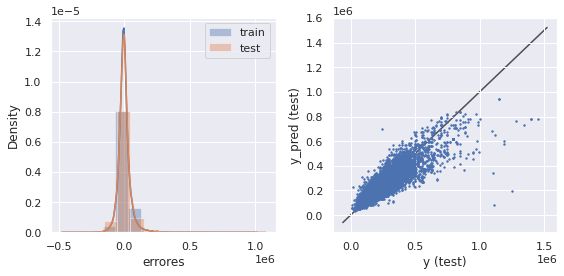

In [ ]:
# Errores

for model_name, model in zip(models, [randomForest, xgbRegressor]):
    dist_errors(model, model_name)

- 

### 7- Optimizacion de Parametros

##### OP Random Forest Regressor

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 150, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split, #no
               #'min_samples_leaf': min_samples_leaf,  #no
               #'bootstrap': bootstrap}
}

print(random_grid)

{'n_estimators': [15, 30, 45, 60, 75, 90, 105, 120, 135, 150], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [5, 10]}


In [ ]:
%%time

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, random_state=42, n_jobs = -1) #,n_iter = 25

# Fit the random search model
rf_random.fit(X_train, y_train)

CPU times: user 35 s, sys: 154 ms, total: 35.1 s
Wall time: 5min 41s


In [ ]:
rf_random

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 120}

In [ ]:
# Store data
#with open(save_path+'rf_r.pickle', 'wb') as rfr1:
#    pickle.dump(rf_random, rfr1, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load data
#with open(save_path+'rf_r.pickle', 'rb') as rfr1:
#    rf_random = pickle.load(rfr1)

In [ ]:
rf_reg = RandomForestRegressor(max_depth= None, min_samples_split= 5, n_estimators= 120, random_state=42)

In [ ]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Modelo: Final RandomForest
Raíz del error cuadrático medio en Train: 16276.656371420146
Raíz del error cuadrático medio en Test: 36570.81828728751


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


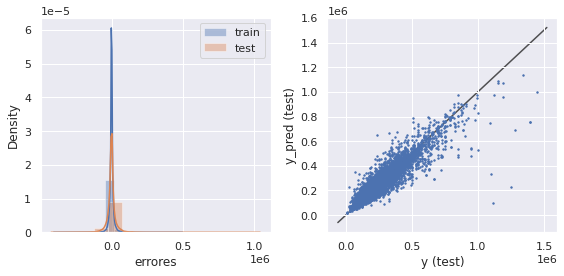

In [ ]:
dist_errors(rf_reg, 'Final RandomForest')

In [ ]:
rf_reg.feature_importances_

array([1.70268342e-02, 1.68154602e-01, 6.37661445e-02, 1.06553302e-02,
       5.22204909e-03, 2.11064657e-02, 1.40554231e-01, 4.36282283e-01,
       3.12618956e-04, 9.70774311e-03, 2.00784663e-03, 5.93531601e-05,
       3.03690836e-05, 4.13279523e-04, 2.21590275e-04, 6.35650274e-04,
       6.84151246e-04, 1.15942466e-03, 3.55702356e-05, 8.47506052e-05,
       3.09052099e-03, 1.98307330e-07, 5.65590046e-05, 1.31948096e-04,
       1.00757004e-04, 2.40280308e-04, 8.17340246e-05, 2.32563065e-04,
       2.39191056e-04, 1.17435131e-04, 7.78692681e-04, 5.49857222e-05,
       4.28179660e-05, 7.97825246e-05, 5.49130960e-05, 2.43701259e-04,
       9.59641811e-05, 4.94226784e-03, 1.34446570e-05, 1.21120949e-04,
       2.80560584e-04, 1.13153129e-04, 1.42623467e-04, 1.94763821e-04,
       3.30857846e-05, 1.06560612e-01, 9.32416690e-04, 1.27574057e-04,
       1.79126763e-04, 1.06881986e-04, 1.04445621e-04, 1.53648744e-04,
       3.87809303e-05, 8.91178440e-06, 1.94428136e-05, 7.97721932e-04,
      

##### OP XGBoost Regressor

In [ ]:
import xgboost as xgb

In [ ]:
parameters = {'nthread': [4],
              'max_depth': np.arange(13, 16),
              'n_estimators': np.arange(215, 219) #n_estimators = [int(x) for x in np.linspace(start = 15, stop = 150, num = 10)]   o  'n_estimators': np.arange(150, 250)
              }

In [ ]:
gridsearch_xgboost = GridSearchCV(XGBRegressor(booster='gbtree',
                                             learning_rate=.02,
                                             importance_type='total_cover',
                                             colsample_bytree=0.62,
                                             random_state=42,
                                             n_jobs=-1),
                                param_grid=parameters, n_jobs=-1) #objective ='reg:squarederror',tree_method = 'gpu_hist'

In [ ]:
%%time
gridsearch_xgboost.fit(X_train, y_train)

[02:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1min 42s, sys: 1.59 s, total: 1min 44s
Wall time: 39min 12s


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.62, gamma=0,
                                    importance_type='total_cover',
                                    learning_rate=0.02, max_delta_step=0,
                                    max_depth=3, min_child_weight=1,
                                    missing=None, n_estimators=100, n_jobs=-1,
                                    nthread=None, objective='reg:linear',
                                    random_state=42, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([13, 14, 15]),
                         'n_estimators': array([215, 216, 2

In [ ]:
gridsearch_xgboost.best_params_

{'max_depth': 15, 'n_estimators': 218, 'nthread': 4}

Modelo: GridSearch XGBRegressor
Raíz del error cuadrático medio en Train: 15151.023772951812
Raíz del error cuadrático medio en Test: 35211.057250147125


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


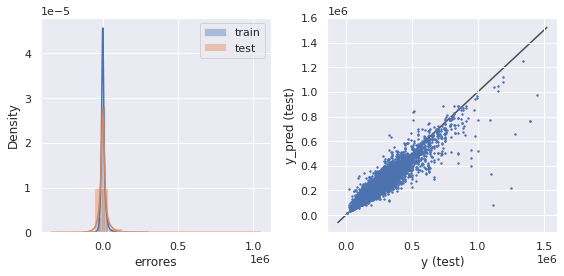

In [ ]:
dist_errors(gridsearch_xgboost, 'GridSearch XGBRegressor')

In [ ]:
# Store data
#with open(save_path+'xgb_r.pickle', 'wb') as xbr1:
#    pickle.dump(gridsearch_xgboost, xbr1, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load data
#with open(save_path+'xgb_r.pickle', 'rb') as xbr1:
#    gridsearch_xgboost2 = pickle.load(xbr1)

[12:52:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#con gpu activado
#XGBRegressor(objective ='reg:squarederror',tree_method = 'gpu_hist')


In [ ]:
xgb_reg = XGBRegressor(max_depth= 15, n_estimators= 218, nthread= 4, n_jobs=-1)  #, objective ='reg:squarederror', tree_method = 'gpu_hist'

In [ ]:
xgb_reg.fit(X_train, y_train)

[02:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=218,
             n_jobs=-1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Modelo: Final XGBRegressor
Raíz del error cuadrático medio en Train: 6587.741946327797
Raíz del error cuadrático medio en Test: 35686.123282917695


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


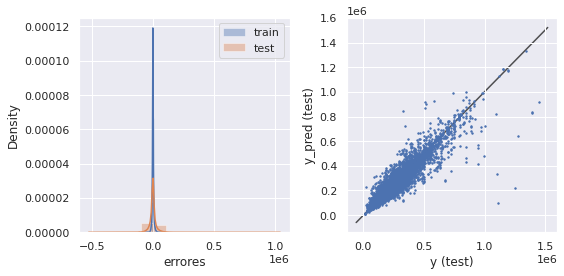

In [ ]:
dist_errors(xgb_reg, 'Final XGBRegressor')

### 8- Compara el desempeño

 En comparacion los modelos optimizados tuvieron resultados MUY parecidos, alrededor de **35 mil usd** de error pero el mejor fue el Random Forest tanto por su menor error pero mas por su velocidad de computo. El Random Forest fue mas rapido en comparacion al XGBoost. Por lo tanto yo segun mis resultados elijo el Random Forest.

No handles with labels found to put in legend.


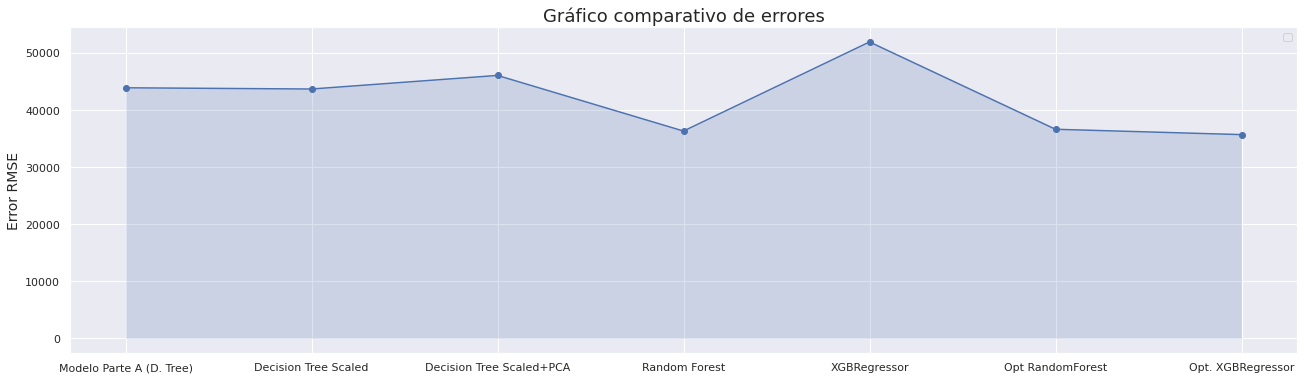

In [ ]:
plt.figure(figsize=(22, 6))
plt.title('Gráfico comparativo de errores', size=18)
models = ['Modelo Parte A (D. Tree)', 'Decision Tree Scaled', 'Decision Tree Scaled+PCA', 'Random Forest', 'XGBRegressor', 'Opt RandomForest', 'Opt. XGBRegressor']
errors = [43885, 43670, 46048, 36311, 51907, 36622, 35686]

plt.plot(models, errors, 'o-')
plt.fill_between(models, errors, alpha=.2)

plt.ylabel('Error RMSE', size=14)
plt.legend()

## PARTE C - Interpretacion de Modelos

### 9- 
¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

In [ ]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [ ]:
base_imp = imp_df(X_train.columns, rf_reg.feature_importances_)
base_imp

,feature,feature_importance
0,surface_covered,4.362823e-01
1,lat,1.681546e-01
2,surface_total,1.405542e-01
3,l3_Puerto Madero,1.065606e-01
4,lon,6.376614e-02
...,...,...
63,l3_Parque Avellaneda,1.344466e-05
64,l3_Villa Riachuelo,1.106443e-05
65,l3_Villa Soldati,1.054304e-05
66,l3_Velez Sarsfield,8.911784e-06


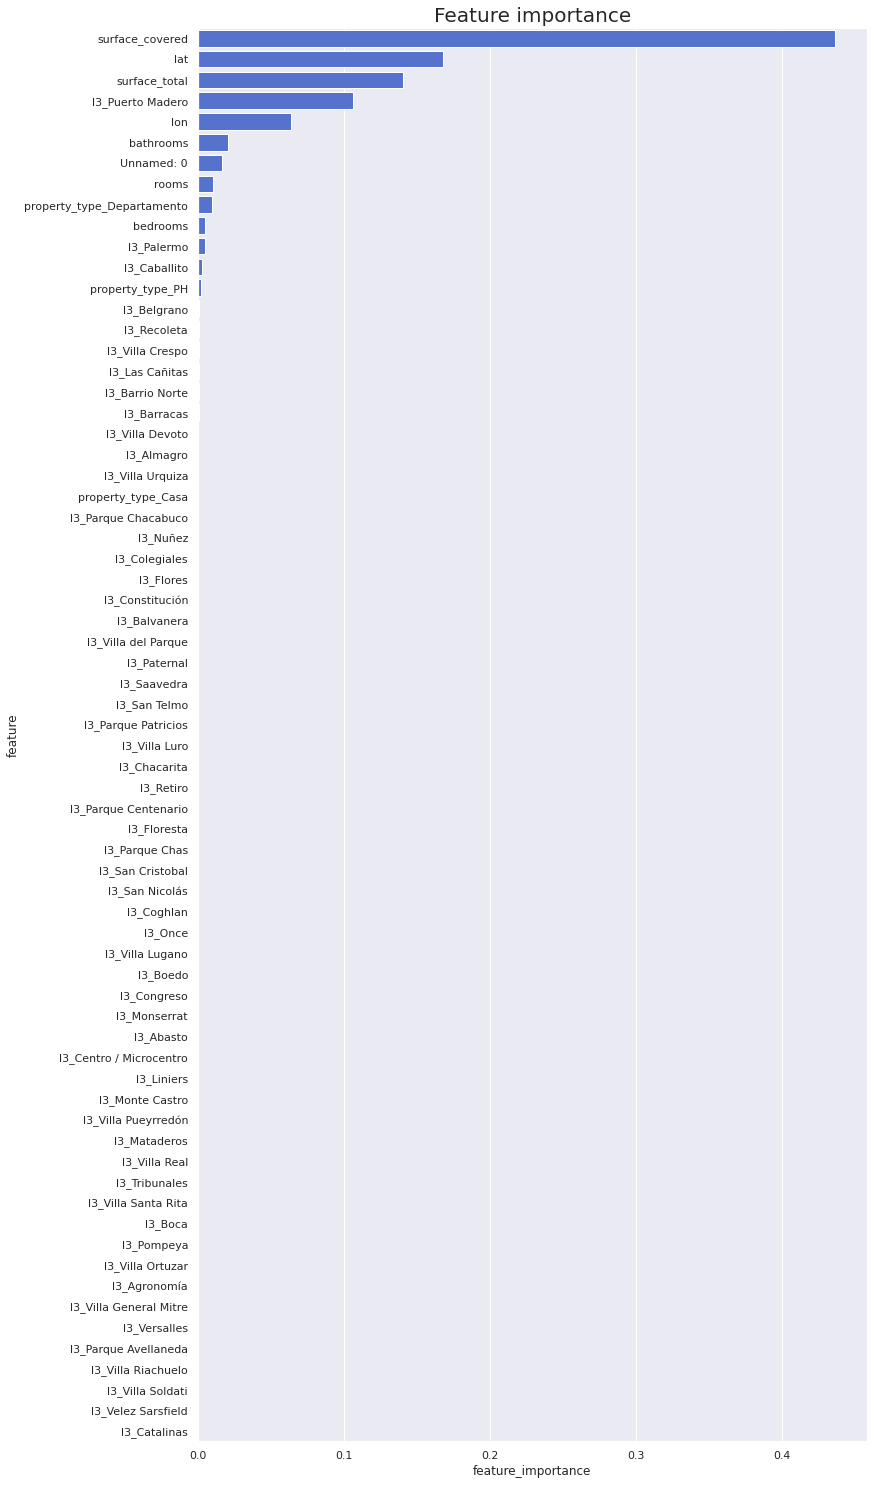

In [ ]:
plt.figure(figsize=(12, 26))
var_imp_plot(base_imp, 'Feature importance')

- Como era de esperarse, los atributos mas importantes son las **Superficies**, seguido por la **Ubicacion** y luego las demas variables que pueden llegar a influir en el precio de una propiedad.

### Conclusion - ¿Qué mejorarías?

A modo de conclusion puedo afirmar que los resultados obtenidos son muy buenos, pero creo que un EDA mas exhaustivo seguiria mejorando el resultado de los modelos adoptados. Ya sea usando los features dropeados como el titulo y descripcion, mediante reconocimiento de lenguaje natural. Tambien con Series de tiempo se podrian abordar las features de fechas, las cuales, puede que tengan informacion valiosa respecto a cuando fue publicado y la relacion del dolar en Argentina en ese momento.